<a href="https://colab.research.google.com/github/namakutiwik/Stocks-with-R/blob/main/Stocks_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# If there is any error
rm(list=ls()) 

# **Return**

## **Asset Prices to Returns**

### Install package

In [ ]:
install.packages("tidyverse")
install.packages("lubridate")
install.packages("readxl")
install.packages("highcharter")
install.packages("tidyquant")
install.packages("timetk")
install.packages("tibbletime")
install.packages("quantmod")
install.packages("PerformanceAnalytics")
install.packages("scales")

library(tidyverse)
library (lubridate)
library(readxl)
library(highcharter)
library(tidyquant)
library(timetk)
library(tibbletime)
library(quantmod)
library(PerformanceAnalytics)
library(scales)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### Extract data

In [ ]:
lists<-read_csv("/content/JII70.csv")
head(lists,2)


── Column specification ────────────────────────────────────────────────────────
cols(
  Symbol = col_character(),
  Company = col_character(),
  Classification = col_character(),
  Sector = col_character(),
  `Sub-Sector` = col_character()
)




Symbol,Company,Classification,Sector,Sub-Sector
<chr>,<chr>,<chr>,<chr>,<chr>
AALI.JK,Astra Agro Lestari Tbk.,Raw Materials,Agriculture,Plantation
ACES.JK,Ace Hardware Indonesia Tbk.,Services,"Trade, Service & Investment",Retail Trade


In [ ]:
symbols<-lists$Symbol
symbols

[1] "AALI.JK" "ACES.JK" "ADHI.JK" "ADRO.JK" "AKRA.JK" "ANTM.JK" "APLN.JK"
 [8] "ASII.JK" "BKSL.JK" "BMTR.JK" "BRIS.JK" "BRPT.JK" "BSDE.JK" "BTPS.JK"
[15] "CLEO.JK" "CPIN.JK" "CTRA.JK" "DMAS.JK" "ERAA.JK" "EXCL.JK" "GIAA.JK"
[22] "ICBP.JK" "INAF.JK" "INCO.JK" "INDF.JK" "INTP.JK" "IPTV.JK" "ISAT.JK"
[29] "ITMG.JK" "JPFA.JK" "JSMR.JK" "KAEF.JK" "KINO.JK" "KLBF.JK" "KREN.JK"
[36] "LINK.JK" "LPKR.JK" "LPPF.JK" "LSIP.JK" "MAPI.JK" "MDKA.JK" "MIKA.JK"
[43] "MNCN.JK" "MTDL.JK" "MYOR.JK" "PGAS.JK" "PPRO.JK" "PTBA.JK" "PTPP.JK"
[50] "PWON.JK" "RALS.JK" "SCMA.JK" "SIDO.JK" "SMBR.JK" "SMGR.JK" "SMRA.JK"
[57] "SMSM.JK" "SSIA.JK" "TARA.JK" "TCPI.JK" "TLKM.JK" "TPIA.JK" "UNTR.JK"
[64] "UNVR.JK" "WEGE.JK" "WIKA.JK" "WOOD.JK" "WSBP.JK" "WTON.JK" "ZINC.JK"

In [ ]:
prices<-
        getSymbols(symbols,
        src="yahoo",
        from="2013-12-31",
        to=Sys.Date(),
        auto.assign=TRUE,
        warnings=FALSE)%>%
map(~Ad(get(.)))%>%
reduce(merge)%>%
'colnames<-'(symbols)

pausing 1 second between requests for more than 5 symbols

pausing 1 second between requests for more than 5 symbols

pausing 1 second between requests for more than 5 symbols

pausing 1 second between requests for more than 5 symbols

pausing 1 second between requests for more than 5 symbols

pausing 1 second between requests for more than 5 symbols

Warning message:
“BRIS.JK contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”
pausing 1 second between requests for more than 5 symbols

pausing 1 second between requests for more than 5 symbols

pausing 1 second between requests for more than 5 symbols

Warning message:
“BTPS.JK contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”
pausing 1 second be

In [ ]:
head(prices,3)

            AALI.JK  ACES.JK  ADHI.JK  ADRO.JK  AKRA.JK  ANTM.JK  APLN.JK
2014-01-02 19693.09 545.7459 1147.595 757.4886 3657.490 877.9175 217.8779
2014-01-03 18734.42 572.5858 1117.786 721.7579 3657.490 845.4022 208.1944
2014-01-06 17595.90 554.6926 1095.434 664.5889 3624.797 816.9514 204.3210
            ASII.JK BKSL.JK  BMTR.JK BRIS.JK  BRPT.JK  BSDE.JK BTPS.JK CLEO.JK
2014-01-02 5688.429  161.46 1796.981      NA 41.25853 1290.217      NA      NA
2014-01-03 5524.732  158.47 1787.523      NA 40.76736 1260.894      NA      NA
2014-01-06 5606.581  155.48 1740.234      NA 40.66913 1221.797      NA      NA
            CPIN.JK  CTRA.JK DMAS.JK  ERAA.JK  EXCL.JK GIAA.JK  ICBP.JK INAF.JK
2014-01-02 3200.747 704.0986      NA 899.0711 4975.553 495.942 4267.803     157
2014-01-03 3087.245 713.1249      NA 873.8634 5023.859 481.064 4165.702     153
2014-01-06 3069.084 699.5851      NA 861.2596 4999.706 487.015 4135.072     152
            INCO.JK  INDF.JK  INTP.JK IPTV.JK  ISAT.JK  ITMG.JK  JPF

### Monthly return

#### *in the xts world*

In [ ]:
prices_monthly<-to.monthly(prices,
                          indexAt="lastof",  # atau firstof buat dapet data per "awal bulan"
                          OHLC=FALSE)
head(prices_monthly,3)

Warning message in to.period(x, "months", indexAt = indexAt, name = name, ...):
“missing values removed from data”


             AALI.JK  ACES.JK ADHI.JK  ADRO.JK  AKRA.JK   ANTM.JK APLN.JK
2019-07-31  9877.684 1814.686 1440.35 1168.375 3789.359  930.6776     202
2019-08-31 10397.562 1705.904 1294.86 1034.977 4108.511 1065.0535     186
2019-09-30 10669.880 1750.406 1294.86 1186.774 3656.286  970.4926     254
            ASII.JK BKSL.JK BMTR.JK BRIS.JK BRPT.JK BSDE.JK  BTPS.JK CLEO.JK
2019-07-31 6680.775     149     388     505     776    1420 3101.746     525
2019-08-31 6370.597     121     338     434     905    1350 3150.670     590
2019-09-30 6299.017     115     340     404     990    1390 3228.947     540
            CPIN.JK  CTRA.JK  DMAS.JK ERAA.JK  EXCL.JK GIAA.JK  ICBP.JK INAF.JK
2019-07-31 5304.208 1219.441 224.3238    2100 3205.058     400 10455.27    2200
2019-08-31 4958.817 1081.205 228.7512    1550 3453.127     488 11774.39    2000
2019-09-30 5279.537 1041.709 208.0898    1825 3413.436     510 11749.96    1505
           INCO.JK  INDF.JK  INTP.JK IPTV.JK ISAT.JK  ITMG.JK  JPFA.JK  JSMR

In [ ]:
asset_returns_xts<-
                  Return.calculate(prices_monthly,
                  method="log") %>%  # others: discrete (simple return) or difference
na.omit()
head(asset_returns_xts,3)

              AALI.JK     ACES.JK    ADHI.JK     ADRO.JK     AKRA.JK
2019-08-31 0.05129337 -0.06181748 -0.1064835 -0.12123387  0.08086382
2019-09-30 0.02585340  0.02575249  0.0000000  0.13685924 -0.11661275
2019-10-31 0.05857526 -0.04625102 -0.0657878  0.01538487  0.04124291
               ANTM.JK     APLN.JK     ASII.JK     BKSL.JK      BMTR.JK
2019-08-31  0.13486741 -0.08252102 -0.04754092 -0.20815576 -0.137959444
2019-09-30 -0.09297649  0.31158759 -0.01129961 -0.05085842  0.005899722
2019-10-31 -0.09121602 -0.17135825  0.06058325  0.01724181  0.095310180
               BRIS.JK     BRPT.JK     BSDE.JK    BTPS.JK      CLEO.JK
2019-08-31 -0.15151390  0.15378242 -0.05055228 0.01564982  0.116724274
2019-09-30 -0.07162966  0.08977000  0.02919915 0.02454106 -0.088553397
2019-10-31 -0.04557751 -0.04124296  0.01782578 0.15154993  0.009216655
               CPIN.JK     CTRA.JK     DMAS.JK     ERAA.JK     EXCL.JK
2019-08-31 -0.06733319 -0.12031670  0.01954467 -0.30368241  0.07455018
2019-09-30

#### *in the tidyverse*

In [ ]:
asset_returns_dplyr_byhand<-
  prices %>%
  to.monthly(indexAt = "lastof", OHLC=FALSE) %>%
  # convert the index to a date
  data.frame(date=index(.)) %>%
  # now remove the index because it got converted to row names
  remove_rownames() %>%
  gather(asset, prices, -date) %>%
  group_by(asset) %>%
  mutate(returns=(log(prices)-log(lag(prices)))) %>%
  select(-prices) %>%
  spread(asset, returns) %>%
  select(date, symbols)

Warning message in to.period(x, "months", indexAt = indexAt, name = name, ...):
“missing values removed from data”


In [ ]:
head(asset_returns_dplyr_byhand, 3)

date,AALI.JK,ACES.JK,ADHI.JK,ADRO.JK,AKRA.JK,ANTM.JK,APLN.JK,ASII.JK,BKSL.JK,⋯,TLKM.JK,TPIA.JK,UNTR.JK,UNVR.JK,WEGE.JK,WIKA.JK,WOOD.JK,WSBP.JK,WTON.JK,ZINC.JK
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2019-07-31,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2019-08-31,0.05129337,-0.06181748,-0.1064835,-0.1212339,0.08086382,0.13486741,-0.08252102,-0.04754092,-0.20815576,⋯,0.03428908,0.34101510,-0.17492667,0.11369708,0.1023620,-0.05715841,-0.06062462,-0.07410802,-0.17720649,0.02715099
2019-09-30,0.02585340,0.02575249,0.0000000,0.1368592,-0.11661275,-0.09297649,0.31158759,-0.01129961,-0.05085842,⋯,-0.03196623,-0.07345435,-0.01686791,-0.04930194,-0.1834032,-0.13806654,0.00000000,-0.04230236,-0.03319803,-0.20544397


In [ ]:
asset_returns_dplyr_byhand<-
  asset_returns_dplyr_byhand %>%
  na.omit()

In [ ]:
asset_returns_long<-
  asset_returns_dplyr_byhand %>%
  gather(asset, returns, -date) %>%
  group_by(asset)

head(asset_returns_long,3)

date,asset,returns
<date>,<chr>,<dbl>
2019-08-31,AALI.JK,0.05129337
2019-09-30,AALI.JK,0.02585340
2019-10-31,AALI.JK,0.05857526


In [ ]:
tail(asset_returns_long,3)

date,asset,returns
<date>,<chr>,<dbl>
2020-08-31,ZINC.JK,-0.04913269
2020-09-30,ZINC.JK,-0.09028685
2020-10-31,ZINC.JK,-0.04016604


### Visualize

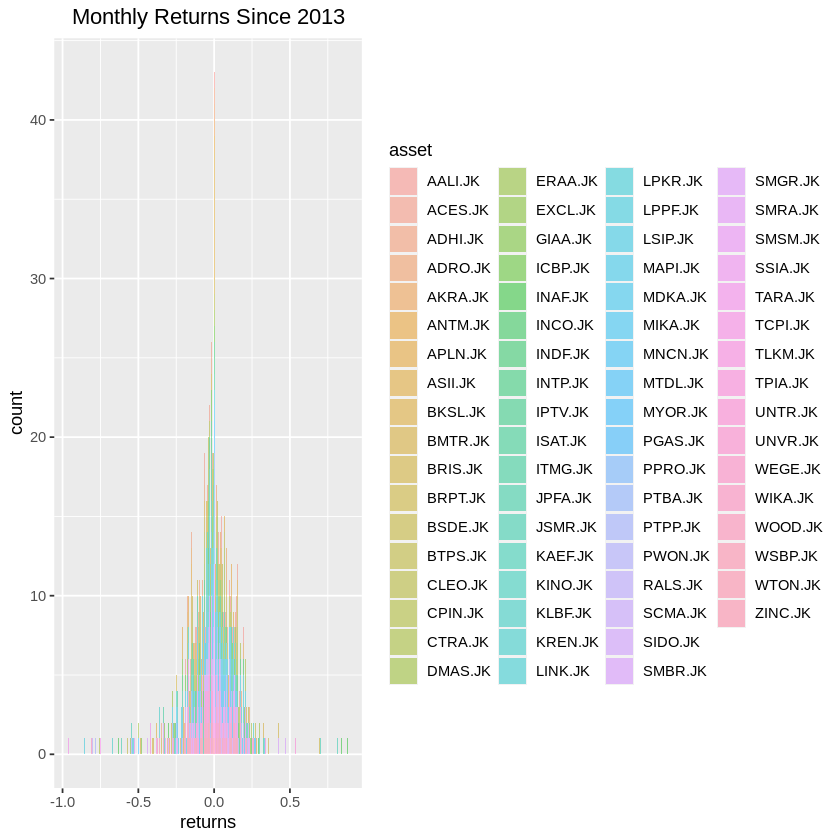

In [ ]:
asset_returns_long %>%
  ggplot(aes(x=returns, fill=asset)) +
  geom_histogram(alpha=0.45, binwidth = 0.005) +
  ggtitle("Monthly Returns Since 2013")

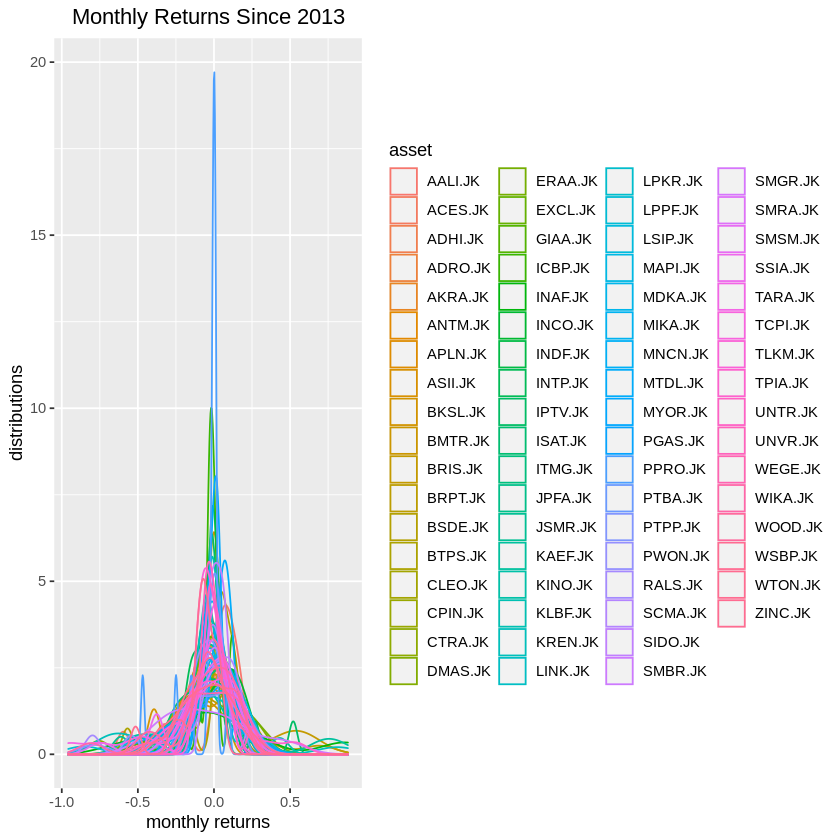

In [ ]:
asset_returns_long %>%
  ggplot(aes(x=returns, colour=asset)) +
  geom_density(alpha=1) +
  ggtitle("Monthly Returns Since 2013") +
  xlab("monthly returns") +
  ylab("distributions") +
  theme_update(plot.title=element_text(hjust=0.5))

**Additional**

### Selected stocks 

In [ ]:
summ_returns<- asset_returns_long %>%
              group_by(asset) %>%
              summarize(average = mean(returns, na.rm = TRUE),
              var = var(returns))
head(summ_returns, 3)

`summarise()` ungrouping output (override with `.groups` argument)



asset,average,var
<chr>,<dbl>,<dbl>
AALI.JK,0.006870762,0.040782499
ACES.JK,-0.009655790,0.009551348
ADHI.JK,-0.060640881,0.024194659


In [ ]:
stocks<-arrange(summ_returns, desc(average), var) # kalau tidak ada func, dia ascending 
best_stocks<-head(stocks,7)
best_stocks

asset,average,var
<chr>,<dbl>,<dbl>
BRIS.JK,0.06354827,0.096794484
MDKA.JK,0.04013713,0.017613938
SIDO.JK,0.02998390,0.005648698
INAF.JK,0.02823224,0.176832644
MIKA.JK,0.01960524,0.010108813
INCO.JK,0.01784543,0.021931765
MTDL.JK,0.01588637,0.012746713


## **Building a Portfolio**

### Portfolio return

In [ ]:
# adjustment
asset_returns_long <- asset_returns_long[asset_returns_long$asset %in% best_stocks$asset,]
symbols<-best_stocks$asset

In [ ]:
# defining weight
w<-c(0.2,
     0.2,
     0.15,
     0.15,
     0.1,
     0.1,
     0.1)

In [ ]:
# sanity check 
tibble(w,symbols) %>%
  summarise(total_weight=sum(w))

total_weight
<dbl>
1


In [ ]:
asset_returns_long %>%
group_by(asset) %>%
mutate(weights=case_when(asset==symbols[1]~w[1],
                         asset==symbols[2]~w[2],
                         asset==symbols[3]~w[3],
                         asset==symbols[4]~w[4],
                         asset==symbols[5]~w[5],
                         asset==symbols[6]~w[6],
                         asset==symbols[7]~w[7])) %>%
tail(3)

date,asset,returns,weights
<date>,<chr>,<dbl>,<dbl>
2020-08-31,SIDO.JK,0.06333588,0.15
2020-09-30,SIDO.JK,0.07307598,0.15
2020-10-31,SIDO.JK,0.01993421,0.15


In [ ]:
portfolio_returns_dplyr_byhand <-
  asset_returns_long %>%
  group_by(asset) %>%
  mutate(weights = case_when(asset == symbols[1] ~ w[1],
                            asset == symbols[2] ~ w[2],
                            asset == symbols[3] ~ w[3],
                            asset == symbols[4] ~ w[4],
                            asset == symbols[5] ~ w[5],
                            asset == symbols[6] ~ w[6],
                            asset == symbols[7] ~ w[7]),
          weighted_returns = returns*weights) %>%
  group_by(date) %>%
  summarise(returns = sum(weighted_returns))

head(portfolio_returns_dplyr_byhand, 3)

`summarise()` ungrouping output (override with `.groups` argument)



date,returns
<date>,<dbl>
2019-08-31,0.07305348
2019-09-30,-0.04803282
2019-10-31,-0.04912798


In [ ]:
portfolio_returns_tq_rebalanced_monthly<-
  asset_returns_long %>%
  tq_portfolio(assets_col=asset,
               returns_col=returns,
               weights=w,
               col_rename="returns",
               rebalance_on="months")

### Visualizing portfolio return


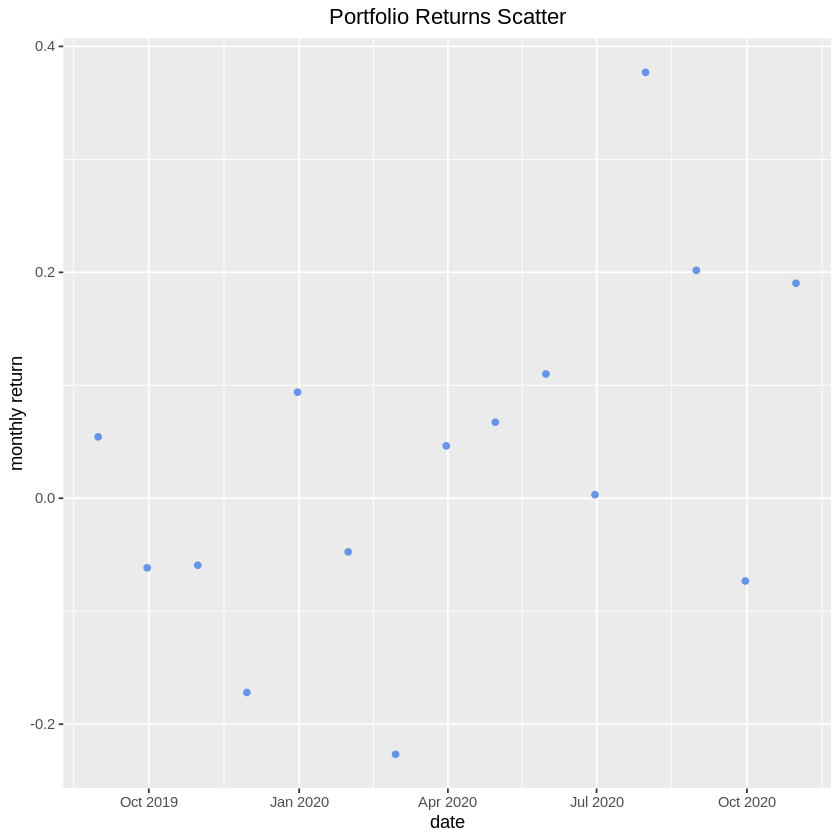

In [ ]:
portfolio_returns_tq_rebalanced_monthly %>%
  ggplot(aes(x=date, y=returns))+
  geom_point(colour="cornflowerblue")+
  xlab("date")+
  ylab("monthly return")+
  theme_update(plot.title=element_text(hjust=0.5))+
  ggtitle("Portfolio Returns Scatter")+
  scale_x_date(breaks=pretty_breaks(n=6))

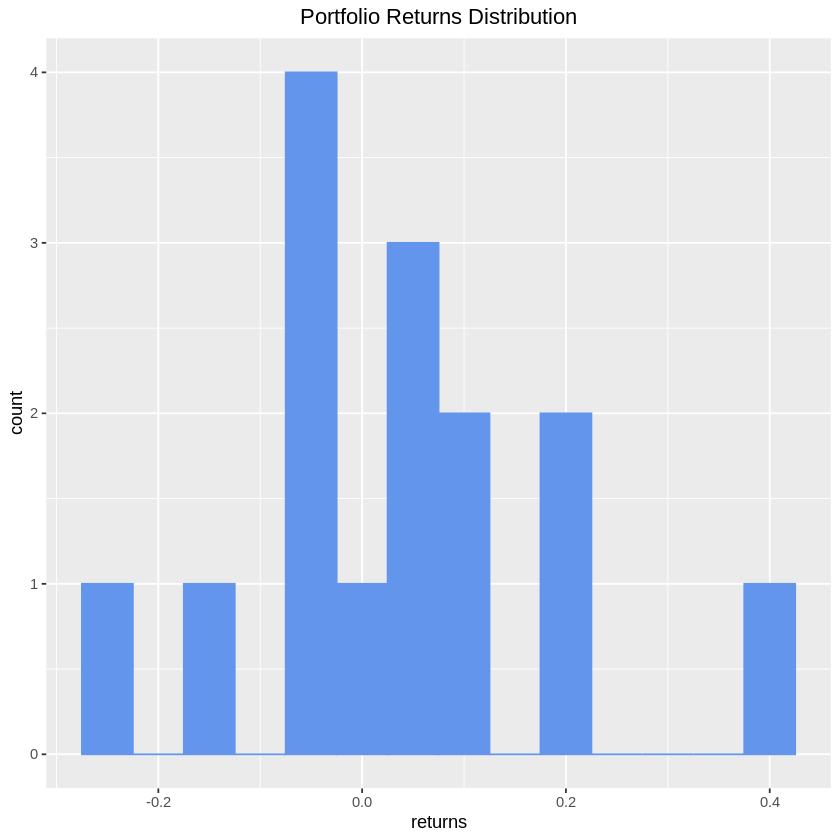

In [ ]:
portfolio_returns_tq_rebalanced_monthly %>%
  ggplot(aes(x=returns))+
  geom_histogram(binwidth = 0.05,
                 fill = "cornflowerblue",
                 color = "cornflowerblue")+
  ggtitle("Portfolio Returns Distribution")+
  theme_update(plot.title=element_text(hjust=0.5))

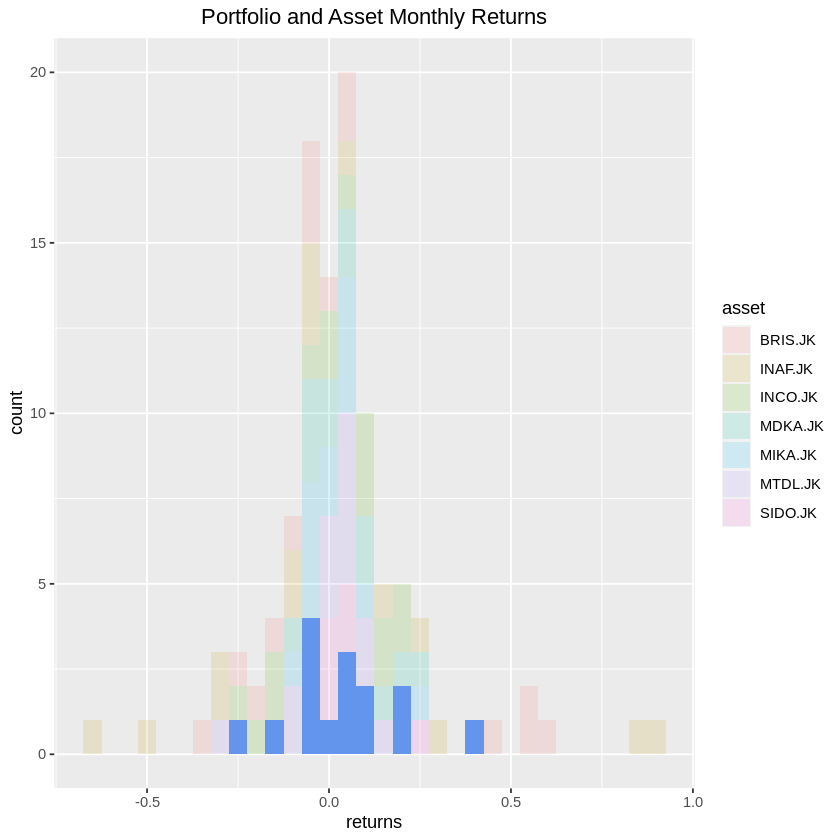

In [ ]:
asset_returns_long %>%
  ggplot(aes(x=returns,
            fill = asset))+
  geom_histogram(alpha=0.15,
                 binwidth=0.05)+
  geom_histogram(data=portfolio_returns_tq_rebalanced_monthly,
                 fill="cornflowerblue",
                 binwidth=0.05)+
  ggtitle("Portfolio and Asset Monthly Returns")+
  theme_update(plot.title=element_text(hjust=0.05))

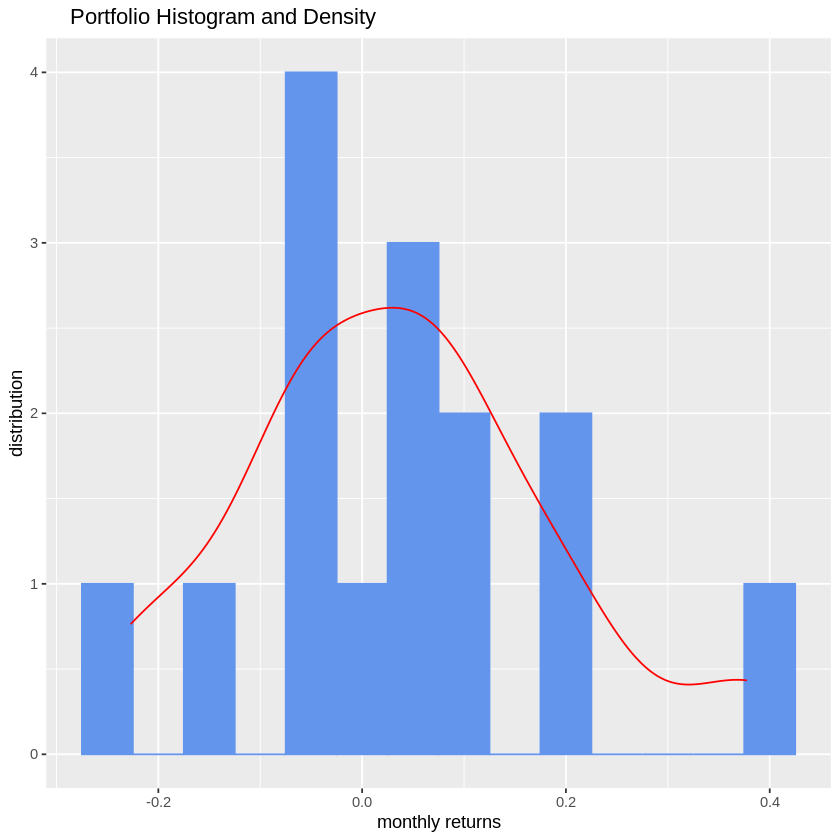

In [ ]:
portfolio_returns_tq_rebalanced_monthly %>%
  ggplot(aes(x=returns))+
  geom_histogram(binwidth = 0.05,
                colour="cornflowerblue",
                fill="cornflowerblue")+
  geom_density(alpha=1, color="red")+
  xlab("monthly returns")+
  ylab("distribution")+
  theme_update(plot.title=element_text(hjust=0.5))+
  ggtitle("Portfolio Histogram and Density")

# **Risk**

## Standard deviation

In [ ]:
portfolio_sd_tidy_builtin_percent <-
  portfolio_returns_dplyr_byhand %>%
  summarise(
      sd=sd(returns)) %>%
  mutate(dplyr=round(sd,4)*100)

portfolio_sd_tidy_builtin_percent %>%
  select(dplyr)

dplyr
<dbl>
13.51


### Visualizing standard deviation

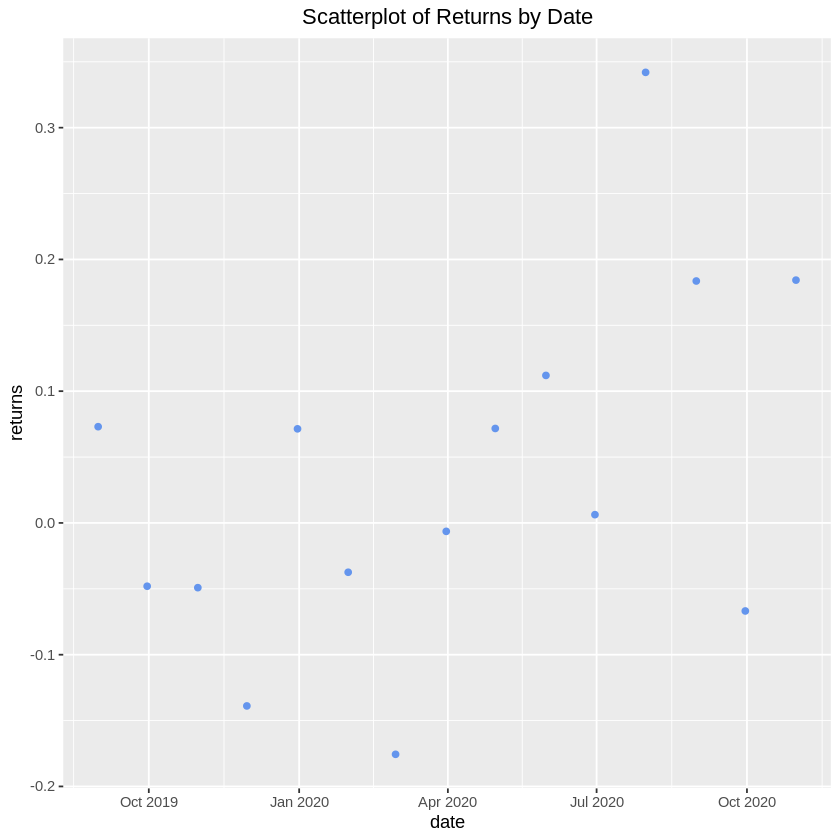

In [ ]:
portfolio_returns_dplyr_byhand %>%
  ggplot(aes(x=date, y=returns))+
  geom_point(color="cornflowerblue")+
  scale_x_date(breaks=pretty_breaks(n=6))+
  ggtitle("Scatterplot of Returns by Date")+
  theme(plot.title = element_text(hjust=0.5))

In [ ]:
sd_plot <-
  sd(portfolio_returns_tq_rebalanced_monthly$returns)
mean_plot <-
  mean(portfolio_returns_tq_rebalanced_monthly$returns)

Warning message:
“Removed 13 rows containing missing values (geom_point).”
Warning message:
“Removed 12 rows containing missing values (geom_point).”
Warning message:
“Removed 5 rows containing missing values (geom_point).”


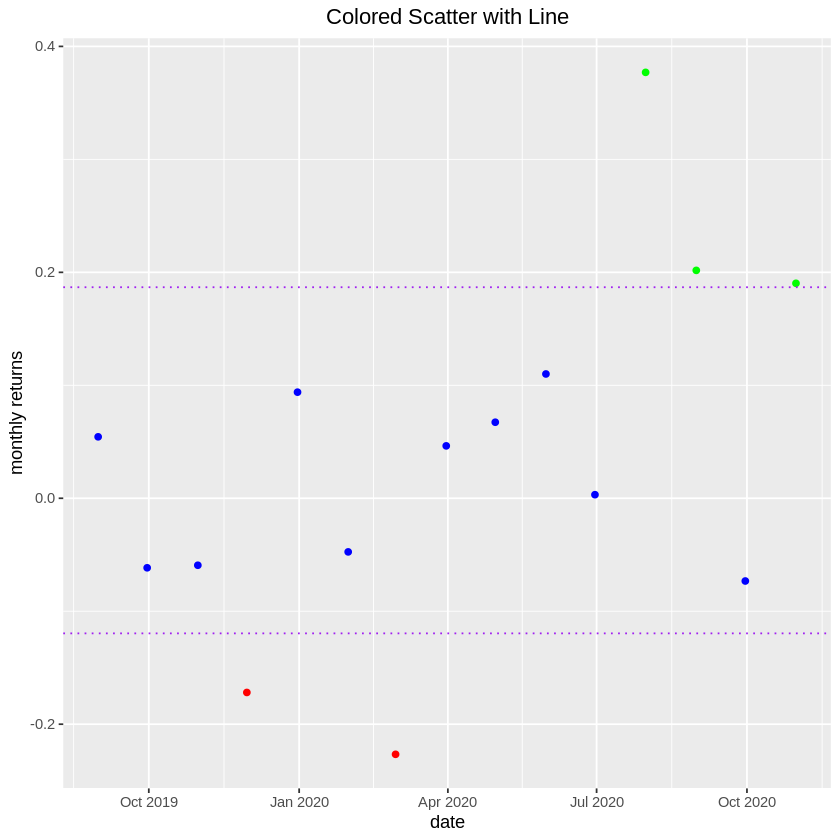

In [ ]:
portfolio_returns_tq_rebalanced_monthly %>%
  mutate(hist_col_red=
        if_else(returns < (mean_plot - sd_plot),
                returns, as.numeric(NA)),
        hist_col_green=
        if_else(returns > (mean_plot + sd_plot),
                returns, as.numeric(NA)),
        hist_col_blue=
        if_else(returns > (mean_plot - sd_plot) &
                returns < (mean_plot + sd_plot),
                returns, as.numeric(NA))) %>%
  ggplot(aes(x=date))+
  geom_point(aes(y=hist_col_red),
                 color="red")+
  geom_point(aes(y=hist_col_green),
                 color="green")+
  geom_point(aes(y=hist_col_blue),
                 color="blue")+
  geom_hline(yintercept = (mean_plot+sd_plot),
             color = "purple",
             linetype = "dotted")+
  geom_hline(yintercept = (mean_plot-sd_plot),
             color = "purple",
             linetype = "dotted")+
  labs(title="Colored Scatter with Line", y="monthly returns")+
  scale_x_date(breaks=pretty_breaks(n=8))+
  theme(plot.title = element_text(hjust=0.5))

`summarise()` ungrouping output (override with `.groups` argument)



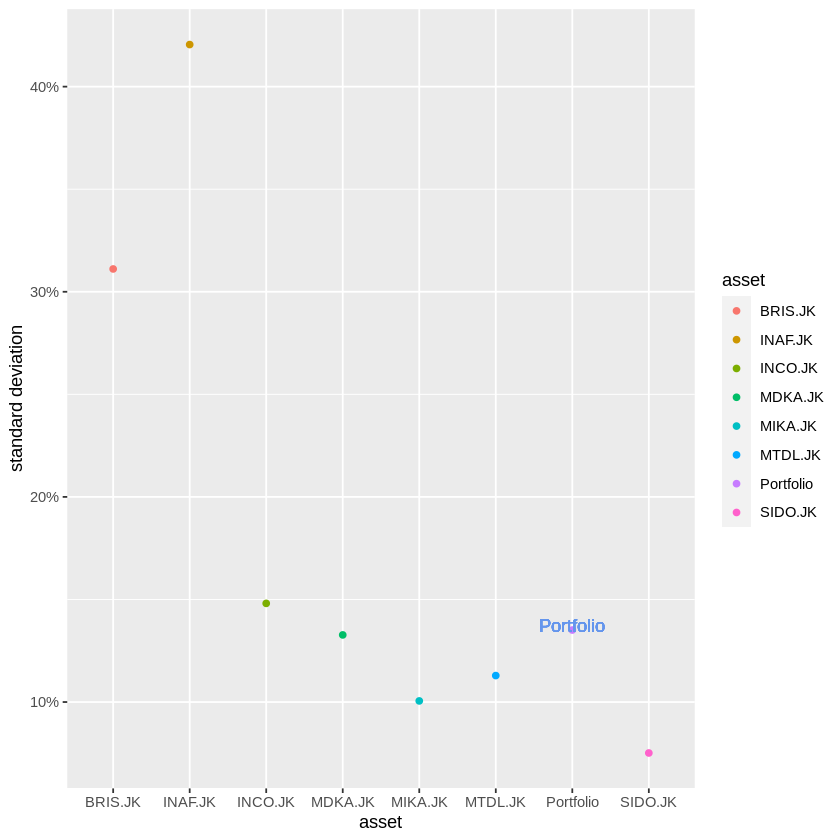

In [ ]:
asset_returns_long %>%
  group_by(asset) %>%
  summarize(sd=100*sd(returns)) %>%
  add_row(asset = "Portfolio",
          sd = portfolio_sd_tidy_builtin_percent$dplyr) %>%
  ggplot(aes(x=asset,
             y=sd,
            colour=asset))+
  geom_point() +
  scale_y_continuous(labels=function(x) paste0(x, "%"))+
  geom_text(
        aes(x="Portfolio",
            y=portfolio_sd_tidy_builtin_percent$dplyr + 0.2),
            label="Portfolio",
            color="cornflowerblue")+
  labs(y="standard deviation")

`summarise()` ungrouping output (override with `.groups` argument)



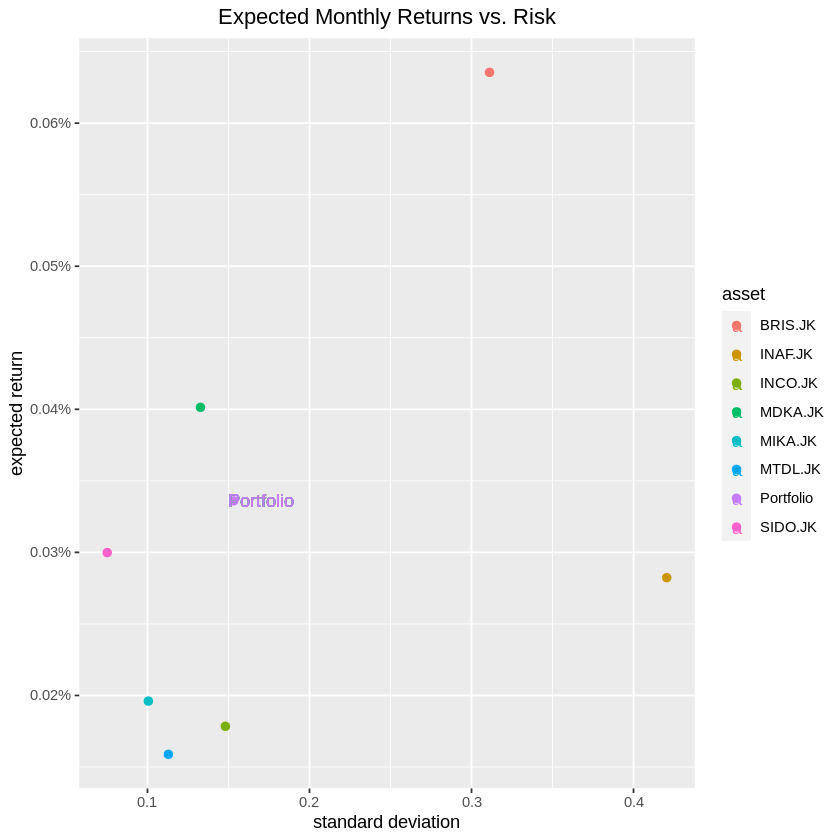

In [ ]:
asset_returns_long %>%
  group_by(asset) %>%
  summarise(expected_return = mean(returns),
            stand_dev = sd(returns)) %>%
  add_row(asset="Portfolio",
          stand_dev=sd(portfolio_returns_tq_rebalanced_monthly$returns),
          expected_return=mean(portfolio_returns_tq_rebalanced_monthly$returns)) %>%
  ggplot(aes(x=stand_dev,
             y=expected_return,
             color=asset))+
  geom_point(size=2)+
  geom_text(aes(x=sd(portfolio_returns_tq_rebalanced_monthly$returns)*1.11,
                y=mean(portfolio_returns_tq_rebalanced_monthly$returns),
                label="Portfolio"))+
  ylab("expected return")+
  xlab("standard deviation")+
  ggtitle("Expected Monthly Returns vs. Risk")+
  scale_y_continuous(labels=function(x){paste0(x, "%")})+
  # the next line centers the title
  theme_update(plot.title=element_text(hjust=0.5))
        

### Rolling standard deviation

In [ ]:
window <- 6

In [ ]:
sd_roll <- rollify(sd, window = window)

In [ ]:
port_rolling_sd_tidy_tibbletime <-
  portfolio_returns_tq_rebalanced_monthly %>%
  as_tbl_time(index=date) %>%
  mutate(sd=sd_roll(returns)) %>%
  select(-returns) %>%
  na.omit()

tail(port_rolling_sd_tidy_tibbletime)

date,sd
<date>,<dbl>
2020-05-31,0.1272192
2020-06-30,0.1200466
2020-07-31,0.1942163
2020-08-31,0.1367216
2020-09-30,0.1590084
2020-10-31,0.1596603


### Visualizing rolling standard deviation

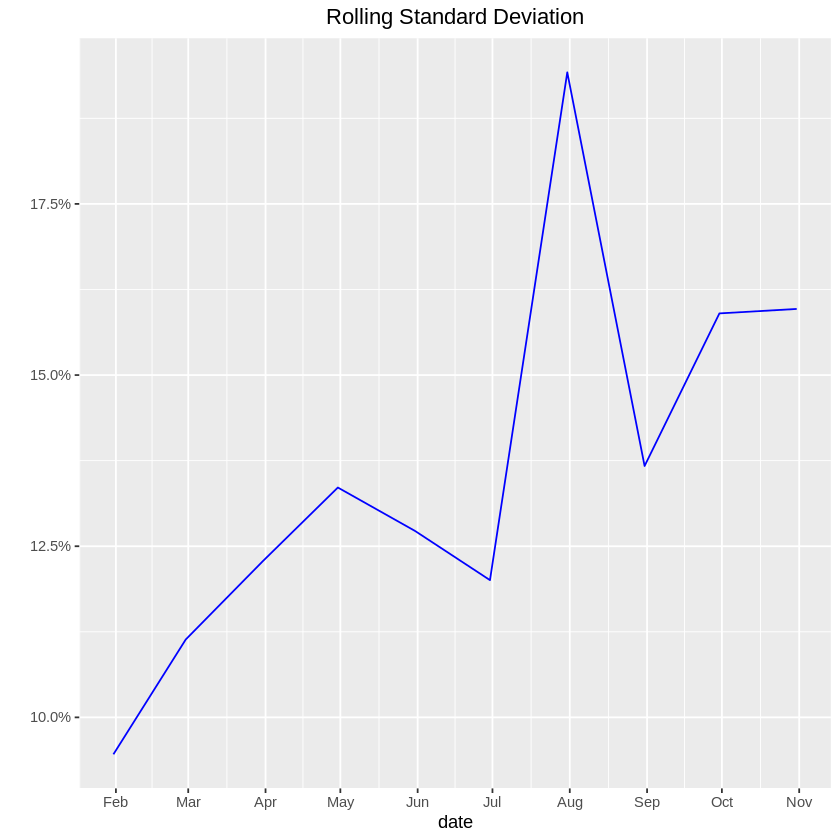

In [ ]:
port_rolling_sd_tidy_tibbletime %>%
  ggplot(aes(x=date)) +
  geom_line(aes(y=sd), color="blue") +
  scale_y_continuous(labels=scales::percent) +
  scale_x_date(breaks = pretty_breaks(n=8)) +
  labs(title="Rolling Standard Deviation", y="") +
    theme(plot.title=element_text(hjust=0.5))

## Skewness

In [ ]:
skew_tidy<-
  portfolio_returns_tq_rebalanced_monthly %>%
  summarise(skew_builtin=skewness(returns))

skew_tidy %>%
  mutate_all(funs(round(., 3)))

Warning message:
“`funs()` is deprecated as of dplyr 0.8.0.
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


skew_builtin
<dbl>
0.413


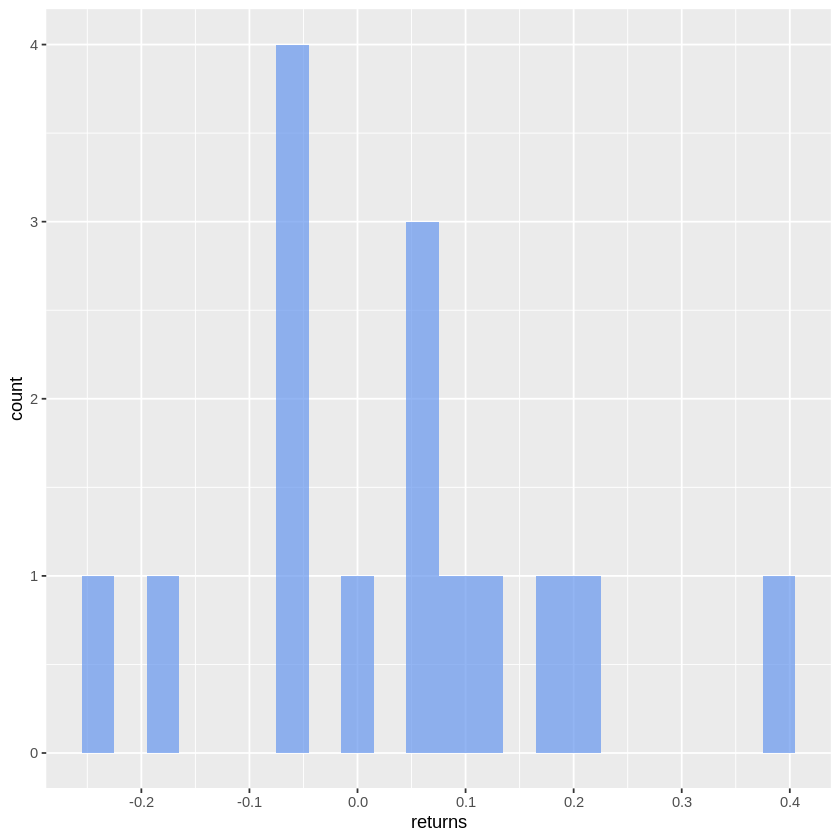

In [ ]:
portfolio_returns_tq_rebalanced_monthly %>%
ggplot(aes(x=returns)) +
geom_histogram(alpha = 0.7,
               binwidth = 0.03,
               fill="cornflowerblue") +
scale_x_continuous(breaks = pretty_breaks(n=7))

Warning message:
“Removed 15 rows containing non-finite values (stat_bin).”


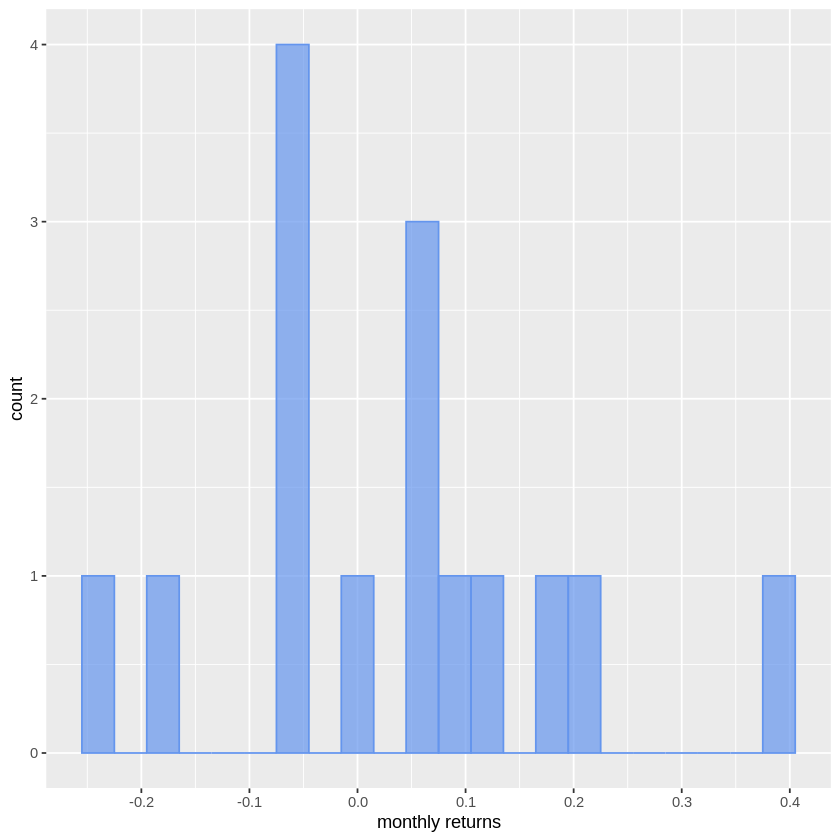

In [ ]:
# Color the threshold
portfolio_returns_tq_rebalanced_monthly %>%
  mutate(hist_col_red=
        if_else(returns < (mean(returns) - 2*sd(returns)),
                returns, as.numeric(NA)),
        returns=
        if_else(returns > (mean(returns) - 2*sd(returns)),
                returns, as.numeric(NA))) %>%
ggplot() +
geom_histogram(aes(x=hist_col_red),
               alpha=0.7,
               binwidth=0.03,
               fill="red",
               color="red") +
geom_histogram(aes(x=returns),
               alpha=0.7,
               binwidth=0.03,
               fill="cornflowerblue",
               color="cornflowerblue") +
scale_x_continuous(breaks=pretty_breaks(n=10)) +
xlab("monthly returns")                

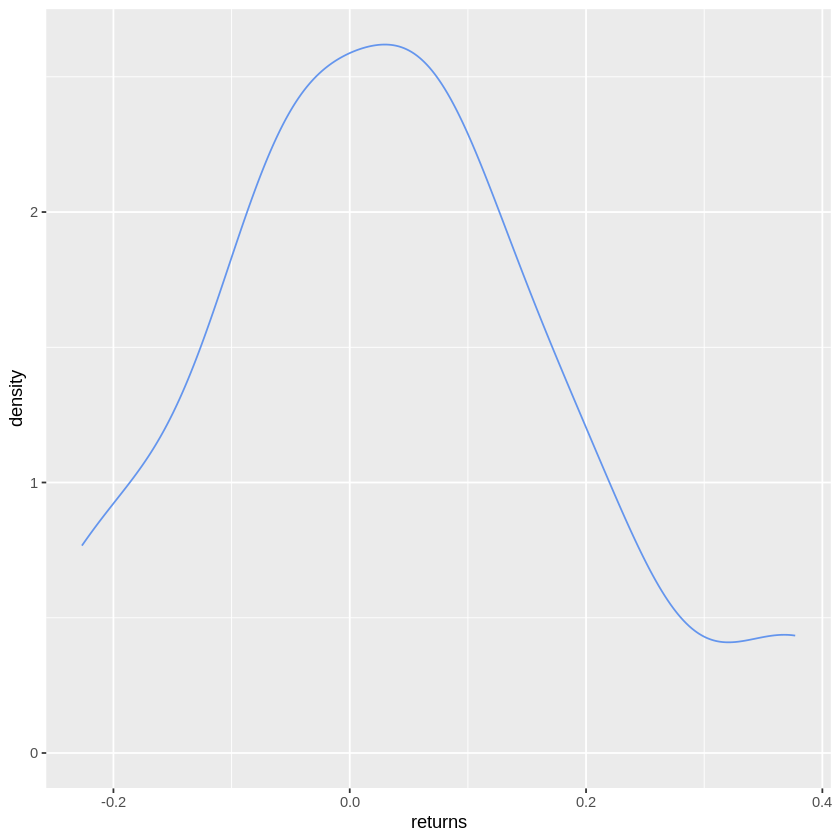

In [ ]:
portfolio_density_plot <-
  portfolio_returns_tq_rebalanced_monthly %>%
  ggplot(aes(x=returns))+
  stat_density(geom="line",
               alpha=1,
               colour="cornflowerblue")

portfolio_density_plot

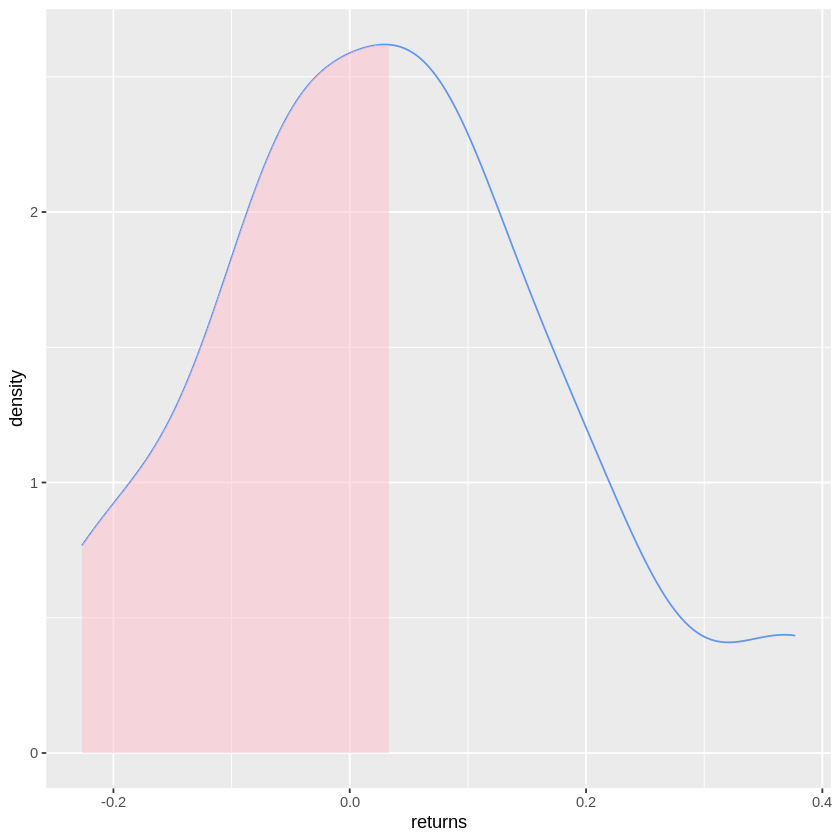

In [ ]:
# Color the threshold
shaded_area_data <-
ggplot_build(portfolio_density_plot)$data[[1]] %>%
  filter(x<mean(portfolio_returns_tq_rebalanced_monthly$returns))

portfolio_density_plot_shaded <-
  portfolio_density_plot +
  geom_area(data=shaded_area_data,
            aes(x=x, y=y),
            fill="pink",
            alpha=0.5)

portfolio_density_plot_shaded

In [ ]:
median <- median(portfolio_returns_tq_rebalanced_monthly$returns)
mean <- mean(portfolio_returns_tq_rebalanced_monthly$returns)

In [ ]:
median_line_data <-
ggplot_build(portfolio_density_plot)$data[[1]] %>%
filter(x <= median)

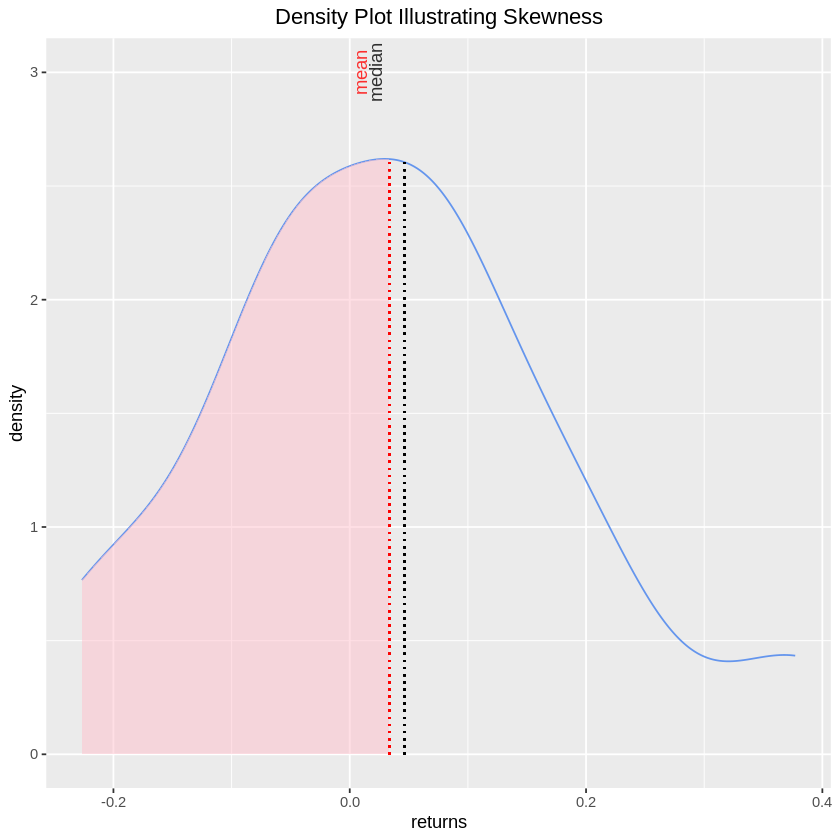

In [ ]:
portfolio_density_plot_shaded +

  geom_segment(data=shaded_area_data,
               aes(x=mean,
                   y=0,
                   xend=mean,
                   yend=density),
               color="red",
               linetype="dotted") +

  annotate(geom="text",
           x = mean,
           y = 3,
           label="mean",
           color="red",
           fontface="plain",
           angle=90,
           alpha=0.8,
           vjust=-1.75) +

  geom_segment(data=median_line_data,
               aes(x=median,
                   y=0,
                   xend=median,
                   yend=density),
               color="black",
               linetype="dotted") +

  annotate(geom="text",
           x = median,
           y = 3,
           label="median",
           fontface="plain",
           angle=90,
           alpha=0.8,
           vjust=-1.75) +
  
  ggtitle("Density Plot Illustrating Skewness")

`summarise()` ungrouping output (override with `.groups` argument)



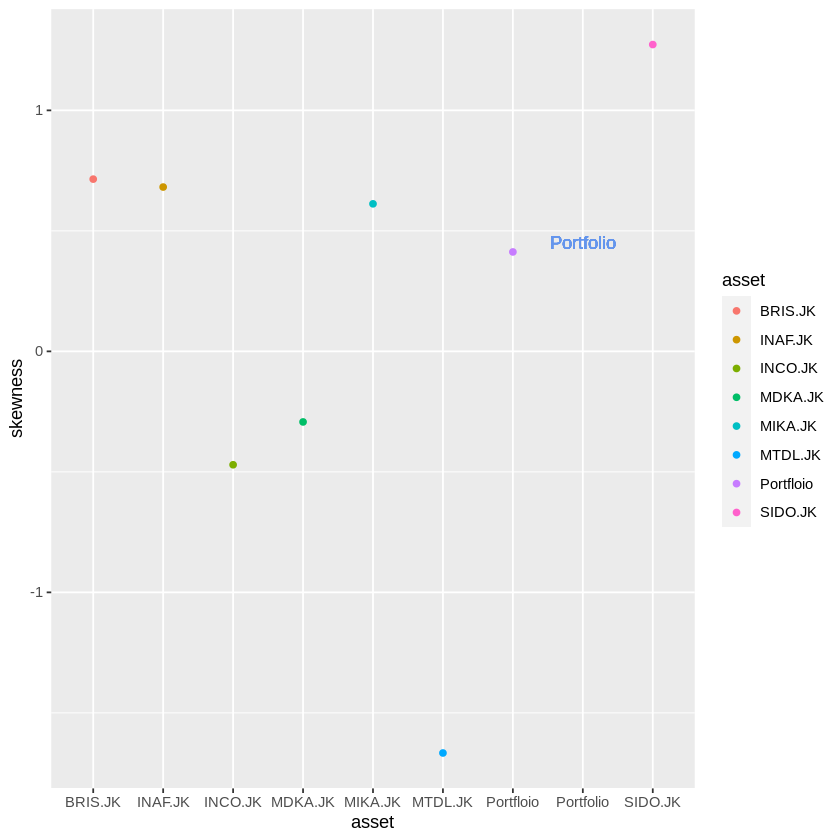

In [ ]:
asset_returns_long %>%
  summarize(skew_assets = skewness(returns)) %>%
  add_row(asset="Portfloio",
          skew_assets = skew_tidy$skew_builtin) %>%
  ggplot(aes(x=asset,
             y=skew_assets,
             colour=asset)) +
  geom_point() +
  geom_text(aes(x = "Portfolio",
                y = skew_tidy$skew_builtin + 0.04),
                label = "Portfolio",
                color="cornflowerblue") +
  labs(y="skewness")

### Rolling skewness

In [ ]:
skew_roll <- rollify(skewness, window=window)

In [ ]:
roll_skew_tibbletime <-
  portfolio_returns_tq_rebalanced_monthly %>%
  as_tbl_time(index = date) %>%
  mutate(skew=skew_roll(returns)) %>%
  select(-returns) %>%
  na.omit()

roll_skew_tibbletime

date,skew
<date>,<dbl>
2020-01-31,-0.03848366
2020-02-29,0.18415491
2020-03-31,-0.11676129
2020-04-30,-0.42171112
2020-05-31,-1.16507841
2020-06-30,-1.05236664
2020-07-31,0.19791448
2020-08-31,0.97416251
2020-09-30,0.58393491


### Visualizing rolling skewness

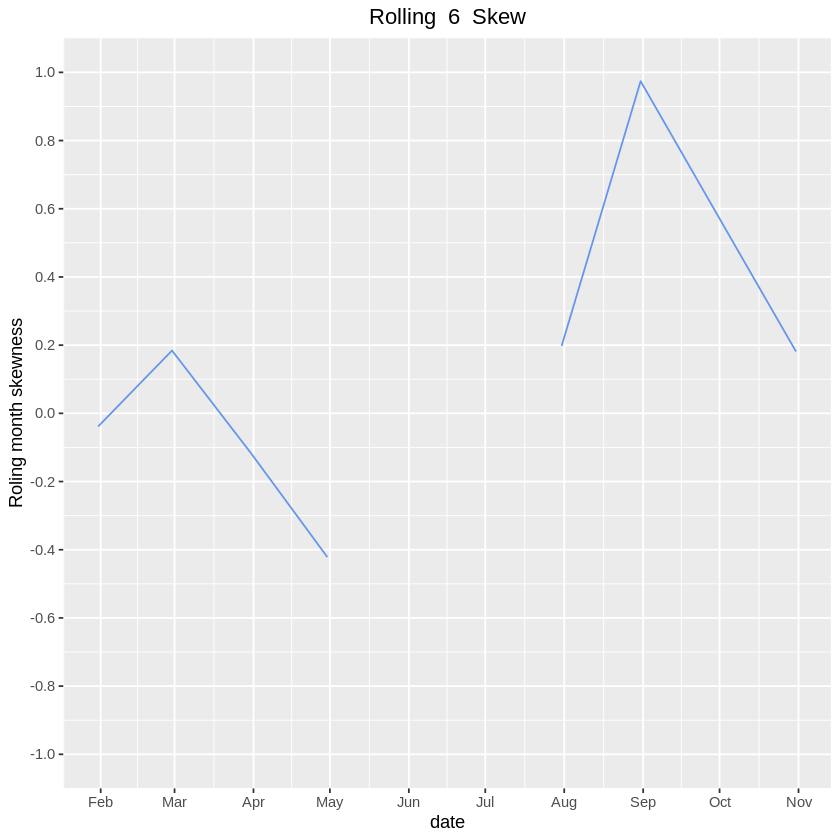

In [ ]:
roll_skew_tibbletime %>%
  ggplot(aes(x=date, y=skew)) +
  geom_line(color="cornflowerblue") +
  ggtitle(paste("Rolling ", window, " Skew")) +
  ylab("Roling month skewness") +
  scale_y_continuous(limits=c(-1,1),
                     breaks=pretty_breaks(n=10)) +
  scale_x_date(breaks=pretty_breaks(n=10)) +
  theme_update(plot.title=element_text(hjust=0.5))

## Kurtosis

1.   kurtosis > 3 having more returns in its tails than the normal
2.   kurtosis < 3 having fewer returns in its tails than the normal
*   negative kurtosis is less risky as fewer returns in the tails

In [ ]:
kurt_tidy <-
  portfolio_returns_tq_rebalanced_monthly %>%
  summarise(kurt_builtin=kurtosis(returns)) %>%
  select(kurt_builtin)

kurt_tidy

kurt_builtin
<dbl>
0.06590389


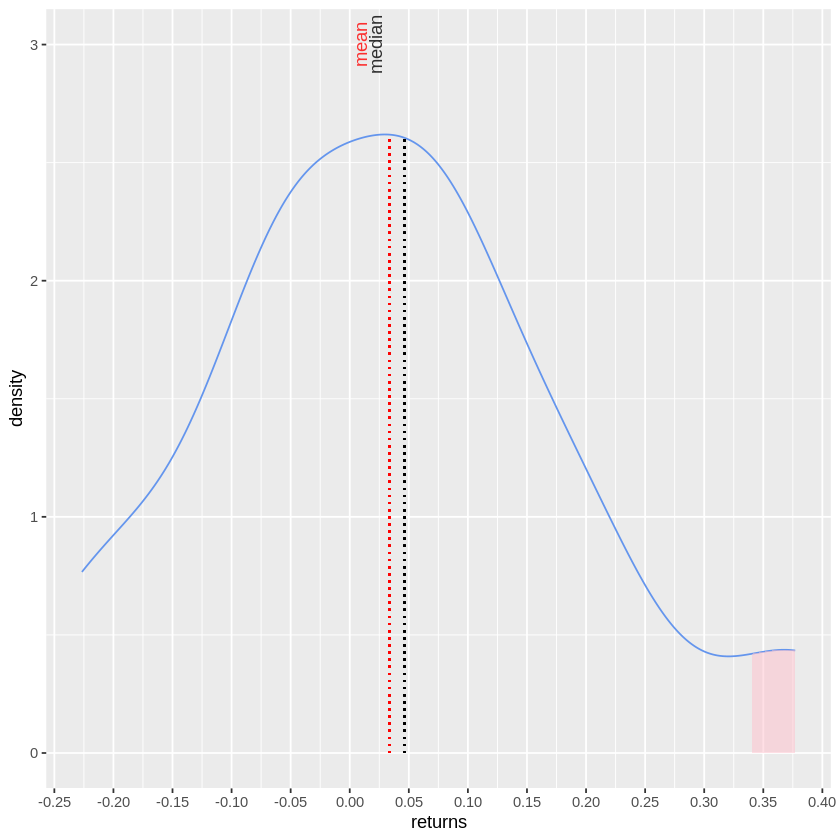

In [ ]:
sd_pos <- mean+(2*sd(portfolio_returns_tq_rebalanced_monthly$returns))
sd_neg <- mean-(2*sd(portfolio_returns_tq_rebalanced_monthly$returns))

sd_pos_shaded_area <-
  ggplot_build(portfolio_density_plot)$data[[1]] %>%
  filter(x > sd_pos)

sd_neg_shaded_area <-
  ggplot_build(portfolio_density_plot)$data[[1]] %>%
  filter(x < sd_neg)

portfolio_density_plot +
  geom_area(data = sd_pos_shaded_area,
            aes(x = x, y = y),
            fill = "pink",
            alpha = 0.5) +
#  geom_area(data = sd_neg_shaded_area,
#            aes(x = x, y = y),
#            fill = "pink",
#            alpha = 0.5) 
  geom_segment(data=shaded_area_data,
               aes(x=mean,
                   y=0,
                   xend=mean,
                   yend=density),
               color="red",
               linetype="dotted")+
  annotate(geom="text",
           x=mean,
           y=3,
           label="mean",
           color="red",
           fontface="plain",
           angle=90,
           alpha=0.8,
           vjust=-1.75)+
  geom_segment(data=median_line_data,
               aes(x=median,
                   y=0,
                   xend=median,
                   yend=density),
               color="black",
               linetype="dotted")+
  annotate(geom="text",
           x=median,
           y=3,
           label="median",
           fontface="plain",
           angle=90,
           alpha=0.8,
           vjust=-1.75)+
  scale_x_continuous(breaks=pretty_breaks(n=10))

`summarise()` ungrouping output (override with `.groups` argument)



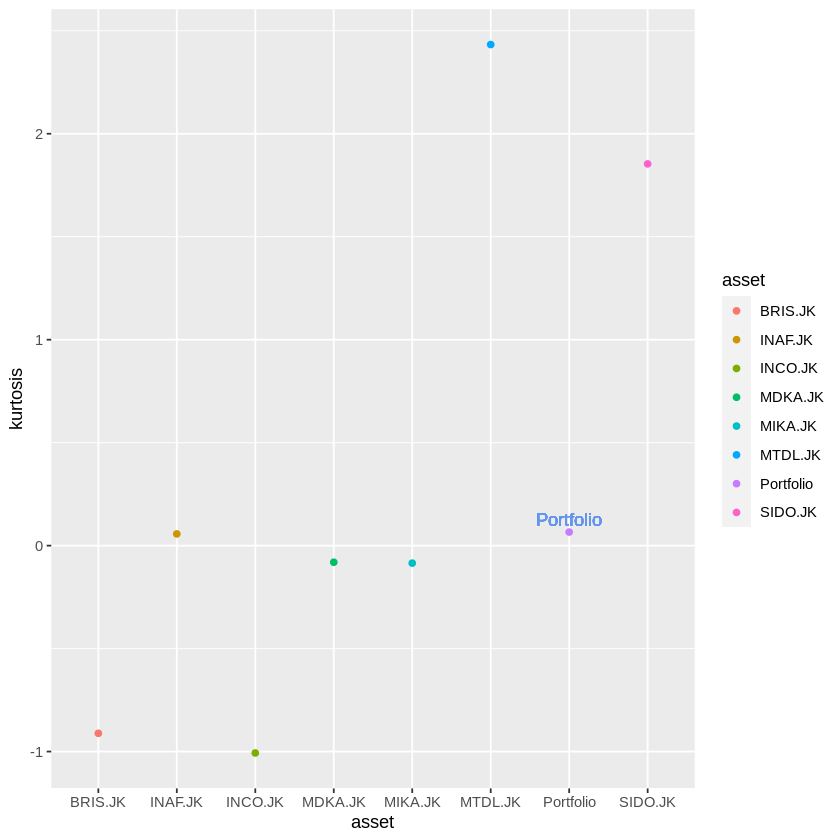

In [ ]:
asset_returns_long %>%
  summarize(kurt_assets = kurtosis(returns)) %>%
  add_row(asset = "Portfolio",
          kurt_assets = kurt_tidy$kurt_builtin) %>%
  ggplot(aes(x=asset,
             y=kurt_assets,
             colour=asset)) +
  geom_point() +
  geom_text(aes(x="Portfolio",
                y=kurt_tidy$kurt_builtin+0.06),
                label="Portfolio",
                color="cornflowerblue")+
  labs(y="kurtosis")

### Rolling kurtosis 

In [ ]:
kurt_roll <- rollify(kurtosis, window=window)

roll_kurt_tibbletime <-
  portfolio_returns_tq_rebalanced_monthly %>%
  as_tbl_time(index=date) %>%
  mutate(kurt=kurt_roll(returns)) %>%
  select(-returns) %>%
  na.omit()

roll_kurt_tibbletime

date,kurt
<date>,<dbl>
2020-01-31,-0.92789257
2020-02-29,-0.74709206
2020-03-31,-1.29925555
2020-04-30,-1.46841697
2020-05-31,-0.08080023
2020-06-30,-0.07899995
2020-07-31,-0.16871823
2020-08-31,-0.34285175
2020-09-30,-0.66648849


### Visualizing rolling kurtosis

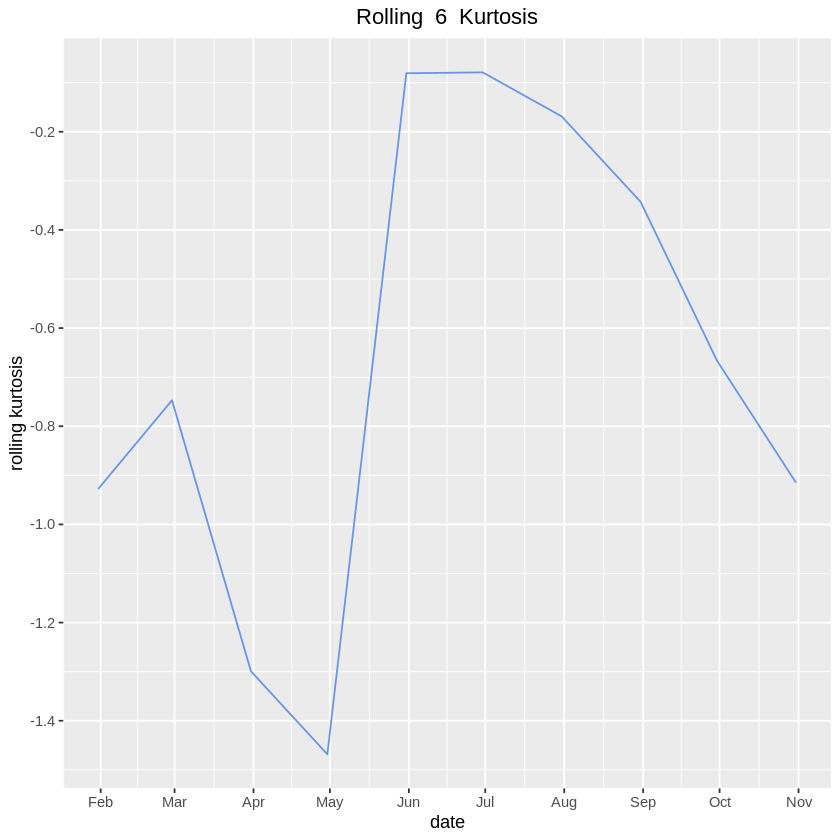

In [ ]:
roll_kurt_tibbletime %>%
  ggplot(aes(x = date, y = kurt)) +
  geom_line(color="cornflowerblue")+
  scale_y_continuous(breaks=pretty_breaks(n=8)) +
  scale_x_date(breaks=pretty_breaks(n=8)) +
  ggtitle(paste("Rolling ", window, " Kurtosis")) +
  labs(y="rolling kurtosis") +
  theme_update(plot.title=element_text(hjust=0.5))


# Portfolio Theory